## import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## load data and get info

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['Years'] = df['date'].dt.year

In [8]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616


In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Years            0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Analysis and Visualization

<Axes: xlabel='bedrooms'>

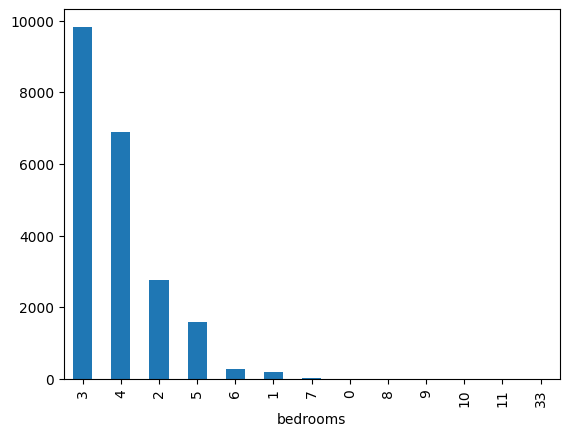

In [11]:
df['bedrooms'].value_counts().plot(kind='bar')

In [12]:
pd.crosstab(df.price,df.sqft_living)

sqft_living,290,370,380,384,390,410,420,430,440,460,...,8000,8010,8020,8670,9200,9640,9890,10040,12050,13540
price,,,,,,,,,,,,,,,,,,,,,
75000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5570000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6885000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


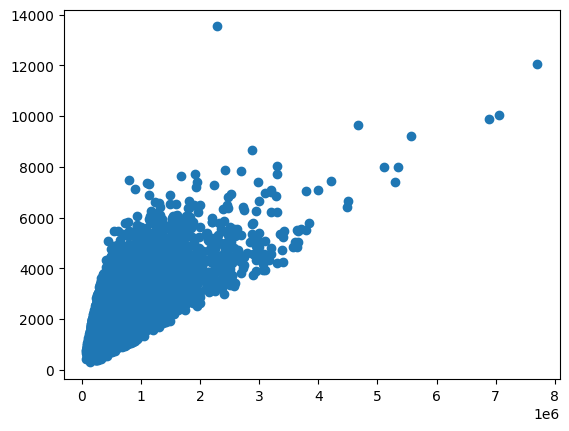

In [13]:
plt.scatter(df.price,df.sqft_living)

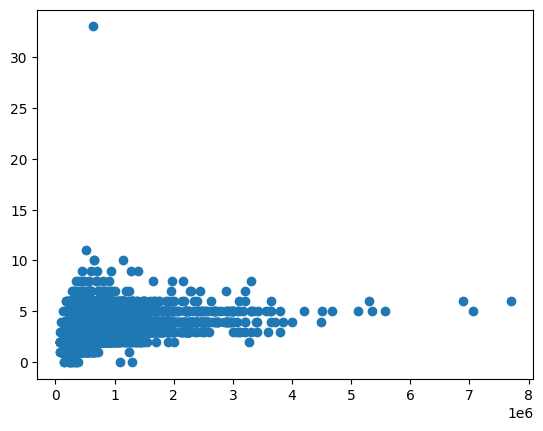

In [14]:
plt.scatter(df.price,df.bedrooms)

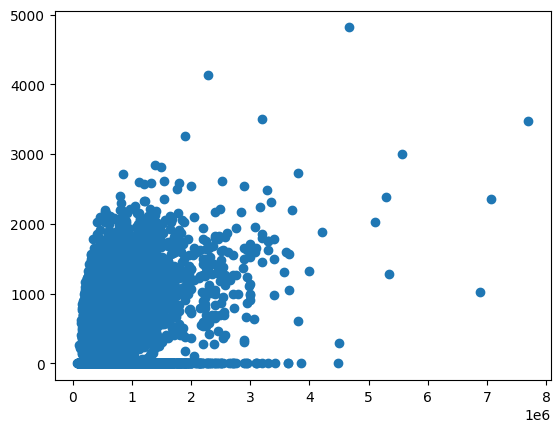

In [15]:
plt.scatter(df.price,df.sqft_basement)

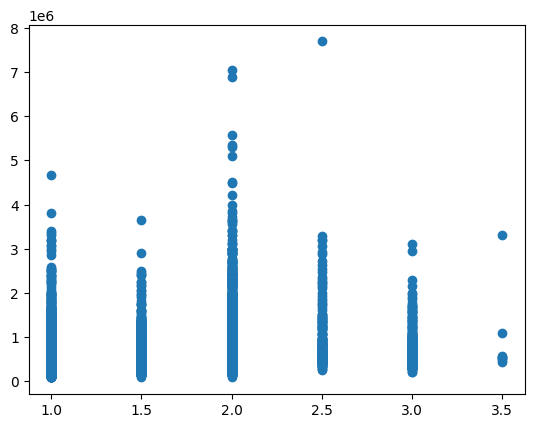

In [16]:
plt.scatter(df.floors,df.price)

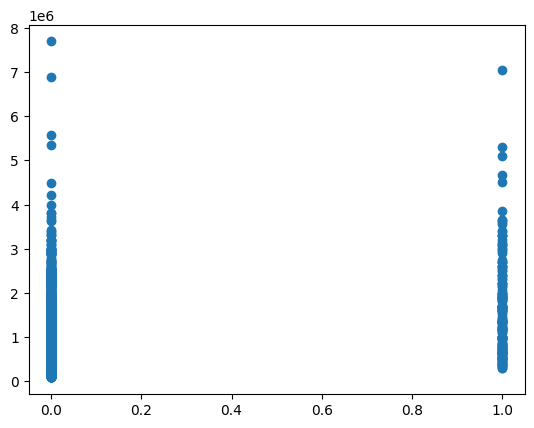

In [17]:
plt.scatter(df.waterfront,df.price)

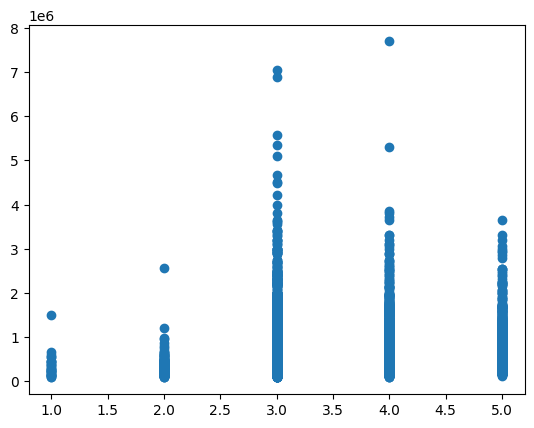

In [18]:
plt.scatter(df.condition,df.price)

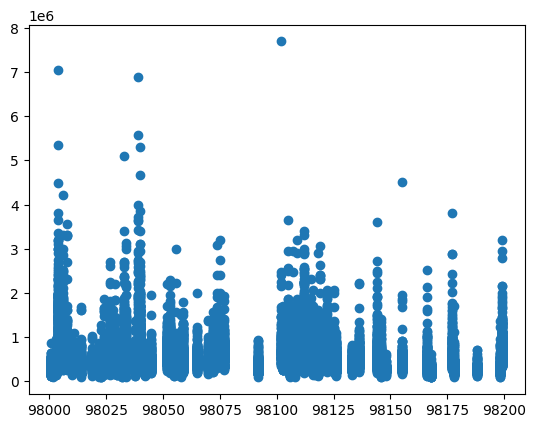

In [19]:
plt.scatter(df.zipcode,df.price)

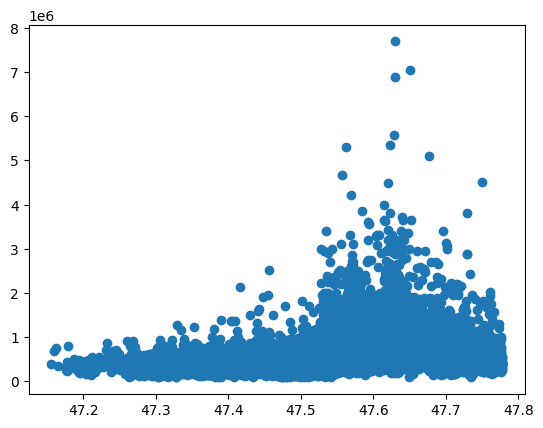

In [20]:
plt.scatter(df.lat,df.price)

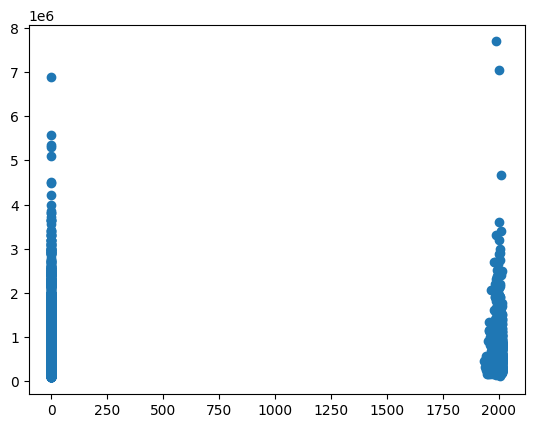

In [21]:
plt.scatter(df.yr_renovated,df.price)

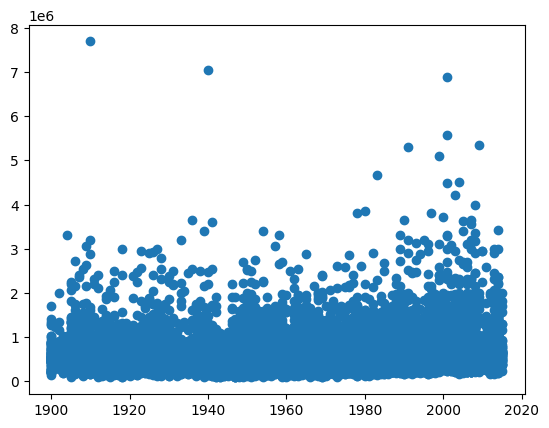

In [22]:
plt.scatter(df.yr_built,df.price)

<Axes: >

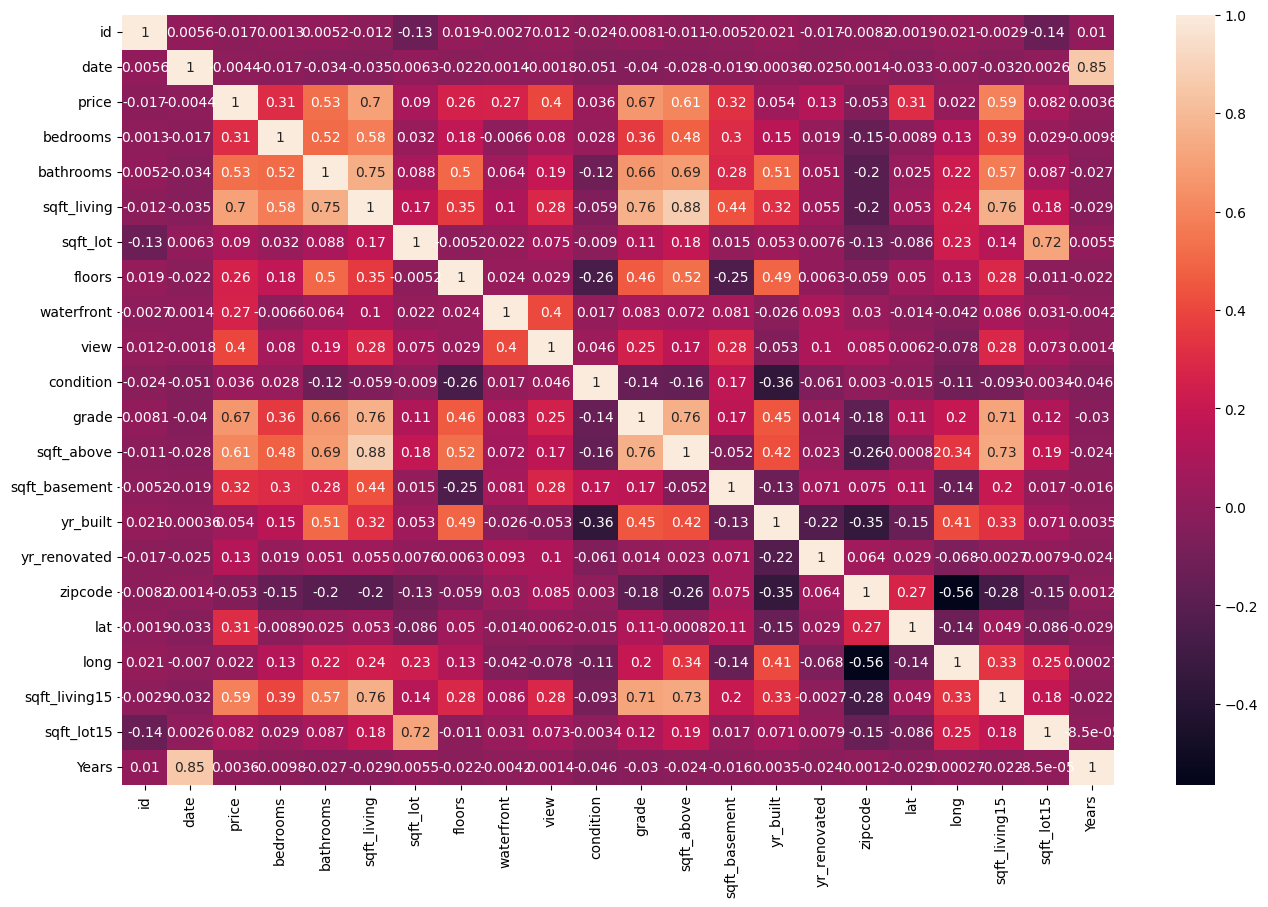

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

## Build Model

In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Years'],
      dtype='object')

In [25]:
df.drop(columns=['date','long','id','floors','zipcode','sqft_lot','sqft_lot15'],inplace=True)

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,Years
0,221900.0,3,1.00,1180,0,0,3,7,1180,0,1955,0,47.5112,1340,2014
1,538000.0,3,2.25,2570,0,0,3,7,2170,400,1951,1991,47.7210,1690,2014
2,180000.0,2,1.00,770,0,0,3,6,770,0,1933,0,47.7379,2720,2015
3,604000.0,4,3.00,1960,0,0,5,7,1050,910,1965,0,47.5208,1360,2014
4,510000.0,3,2.00,1680,0,0,3,8,1680,0,1987,0,47.6168,1800,2015


In [27]:
reg=LinearRegression()

In [28]:
x = df.drop(columns='price',axis=1)
y = df['price']

In [29]:
x

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,Years
0,3,1.00,1180,0,0,3,7,1180,0,1955,0,47.5112,1340,2014
1,3,2.25,2570,0,0,3,7,2170,400,1951,1991,47.7210,1690,2014
2,2,1.00,770,0,0,3,6,770,0,1933,0,47.7379,2720,2015
3,4,3.00,1960,0,0,5,7,1050,910,1965,0,47.5208,1360,2014
4,3,2.00,1680,0,0,3,8,1680,0,1987,0,47.6168,1800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,0,0,3,8,1530,0,2009,0,47.6993,1530,2014
21609,4,2.50,2310,0,0,3,8,2310,0,2014,0,47.5107,1830,2015
21610,2,0.75,1020,0,0,3,7,1020,0,2009,0,47.5944,1020,2014
21611,3,2.50,1600,0,0,3,8,1600,0,2004,0,47.5345,1410,2015


In [30]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [31]:
reg.fit(x,y)

LinearRegression()

In [32]:
reg.score(x,y)

0.69477711309738